# INTRUSION DETECTION SYSTEM

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [ ]:
os.listdir(os.getcwd())

['.config', 'drive', 'sample_data']

In [ ]:
#DATA PREPROCESSING
train = pd.read_csv('/content/drive/MyDrive/IDS/KDDTrain+.txt',delimiter=',')
test = pd.read_csv('/content/drive/MyDrive/IDS/KDDTest+.txt',delimiter=',')

In [ ]:
display(train.head(4))

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17.1,0.03,0.17.2,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.0,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.1,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.0,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21


In [ ]:
display(test.head(4))

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [ ]:
# relation 'KDDTrain'
li = '''@attribute 'protocol_type' {'tcp','udp', 'icmp'} 
    @attribute 'service' {'aol', 'auth', 'bgp', 'courier', 'csnet_ns', 'ctf', 'daytime', 'discard', 'domain', 'domain_u', 'echo', 'eco_i', 'ecr_i', 'efs', 'exec', 'finger', 'ftp', 'ftp_data', 'gopher', 'harvest', 'hostnames', 'http', 'http_2784', 'http_443', 'http_8001', 'imap4', 'IRC', 'iso_tsap', 'klogin', 'kshell', 'ldap', 'link', 'login', 'mtp', 'name', 'netbios_dgm', 'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp', 'nntp', 'ntp_u', 'other', 'pm_dump', 'pop_2', 'pop_3', 'printer', 'private', 'red_i', 'remote_job', 'rje', 'shell', 'smtp', 'sql_net', 'ssh', 'sunrpc', 'supdup', 'systat', 'telnet', 'tftp_u', 'tim_i', 'time', 'urh_i', 'urp_i', 'uucp', 'uucp_path', 'vmnet', 'whois', 'X11', 'Z39_50'} 
    @attribute 'flag' { 'OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3', 'SF', 'SH' }
    @attribute 'src_bytes' real
    @attribute 'dst_bytes' real
    @attribute 'land' {'0', '1'}
    @attribute 'wrong_fragment' real
    @attribute 'urgent' real
    @attribute 'hot' real
    @attribute 'num_failed_logins' real
    @attribute 'logged_in' {'0', '1'}
    @attribute 'num_compromised' real
    @attribute 'root_shell' real
    @attribute 'su_attempted' real
    @attribute 'num_root' real
    @attribute 'num_file_creations' real
    @attribute 'num_shells' real
    @attribute 'num_access_files' real
    @attribute 'num_outbound_cmds' real
    @attribute 'is_host_login' {'0', '1'}
    @attribute 'is_guest_login' {'0', '1'}
    @attribute 'count' real
    @attribute 'srv_count' real
    @attribute 'serror_rate' real
    @attribute 'srv_serror_rate' real
    @attribute 'rerror_rate' real
    @attribute 'srv_rerror_rate' real
    @attribute 'same_srv_rate' real
    @attribute 'diff_srv_rate' real
    @attribute 'srv_diff_host_rate' real
    @attribute 'dst_host_count' real
    @attribute 'dst_host_srv_count' real
    @attribute 'dst_host_same_srv_rate' real
    @attribute 'dst_host_diff_srv_rate' real
    @attribute 'dst_host_same_src_port_rate' real
    @attribute 'dst_host_srv_diff_host_rate' real
    @attribute 'dst_host_serror_rate' real
    @attribute 'dst_host_srv_serror_rate' real
    @attribute 'dst_host_rerror_rate' real
    @attribute 'dst_host_srv_rerror_rate' real
@attribute 'class' {'normal', 'anomaly'} '''

In [ ]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

In [ ]:
train.columns = columns
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [ ]:
test.columns = columns
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [ ]:
#Numerical Columns
train.drop(['protocol_type', 'service', 'flag', 'attack'],axis=1)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
0,0,146,0,0,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15
1,0,0,0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19
2,0,232,8153,0,0,0,0,0,1,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21
3,0,199,420,0,0,0,0,0,1,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21
4,0,0,0,0,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,0,0,0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,20
125968,8,105,145,0,0,0,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,21
125969,0,2231,384,0,0,0,0,0,1,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,18
125970,0,0,0,0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,20


In [ ]:
# Categorical columns
train[['protocol_type', 'service', 'flag', 'attack']]

,protocol_type,service,flag,attack
0,udp,other,SF,normal
1,tcp,private,S0,neptune
2,tcp,http,SF,normal
3,tcp,http,SF,normal
4,tcp,private,REJ,neptune
...,...,...,...,...
125967,tcp,private,S0,neptune
125968,udp,private,SF,normal
125969,tcp,smtp,SF,normal
125970,tcp,klogin,S0,neptune


In [ ]:
train['protocol_type'].unique()

array(['udp', 'tcp', 'icmp'], dtype=object)

In [ ]:
train['service'].unique()

array(['other', 'private', 'http', 'remote_job', 'ftp_data', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object)

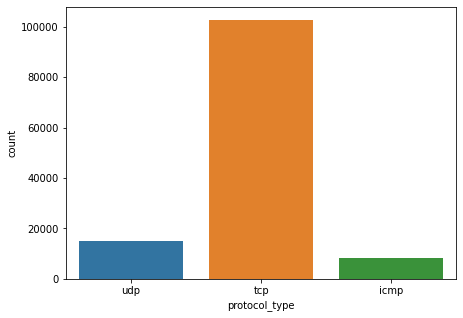

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(data = train , x=train['protocol_type'])
plt.show()

In [ ]:
protocol_type = {}
li = list(train['protocol_type'].unique())
for i in range(len(train['protocol_type'].unique())):
    protocol_type[li[i]]=i
protocol_type

{'udp': 0, 'tcp': 1, 'icmp': 2}

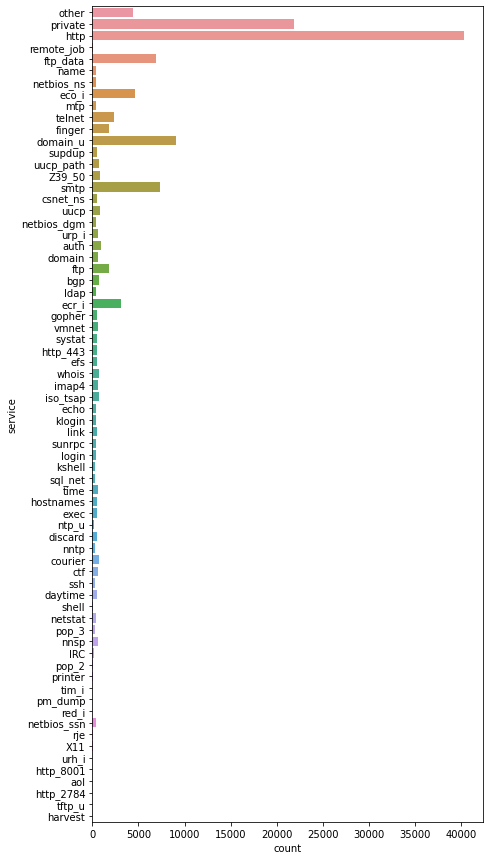

In [ ]:
plt.figure(figsize=(7,15))
sns.countplot(data = train , y=train['service'])
plt.show()

In [ ]:
service_type = {}
li = list(train['service'].unique())
for i in range(len(train['service'].unique())):
    service_type[li[i]]=i
service_type

{'other': 0,
 'private': 1,
 'http': 2,
 'remote_job': 3,
 'ftp_data': 4,
 'name': 5,
 'netbios_ns': 6,
 'eco_i': 7,
 'mtp': 8,
 'telnet': 9,
 'finger': 10,
 'domain_u': 11,
 'supdup': 12,
 'uucp_path': 13,
 'Z39_50': 14,
 'smtp': 15,
 'csnet_ns': 16,
 'uucp': 17,
 'netbios_dgm': 18,
 'urp_i': 19,
 'auth': 20,
 'domain': 21,
 'ftp': 22,
 'bgp': 23,
 'ldap': 24,
 'ecr_i': 25,
 'gopher': 26,
 'vmnet': 27,
 'systat': 28,
 'http_443': 29,
 'efs': 30,
 'whois': 31,
 'imap4': 32,
 'iso_tsap': 33,
 'echo': 34,
 'klogin': 35,
 'link': 36,
 'sunrpc': 37,
 'login': 38,
 'kshell': 39,
 'sql_net': 40,
 'time': 41,
 'hostnames': 42,
 'exec': 43,
 'ntp_u': 44,
 'discard': 45,
 'nntp': 46,
 'courier': 47,
 'ctf': 48,
 'ssh': 49,
 'daytime': 50,
 'shell': 51,
 'netstat': 52,
 'pop_3': 53,
 'nnsp': 54,
 'IRC': 55,
 'pop_2': 56,
 'printer': 57,
 'tim_i': 58,
 'pm_dump': 59,
 'red_i': 60,
 'netbios_ssn': 61,
 'rje': 62,
 'X11': 63,
 'urh_i': 64,
 'http_8001': 65,
 'aol': 66,
 'http_2784': 67,
 'tftp_u': 

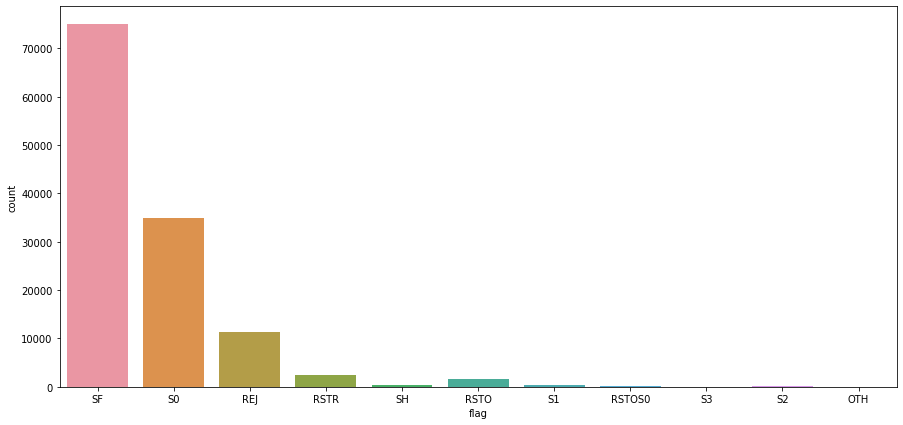

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data = train , x=train['flag'])
plt.show()

In [ ]:
flag_type = {}
li = list(train['flag'].unique())
for i in range(len(train['flag'].unique())):
    flag_type[li[i]]=i
flag_type 

{'SF': 0,
 'S0': 1,
 'REJ': 2,
 'RSTR': 3,
 'SH': 4,
 'RSTO': 5,
 'S1': 6,
 'RSTOS0': 7,
 'S3': 8,
 'S2': 9,
 'OTH': 10}

In [ ]:
train['attack'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

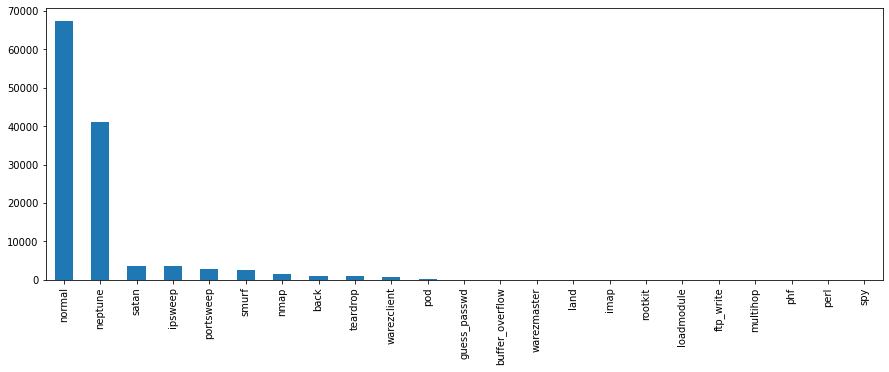

In [ ]:
train['attack'].value_counts().plot.bar(figsize=(15,5))

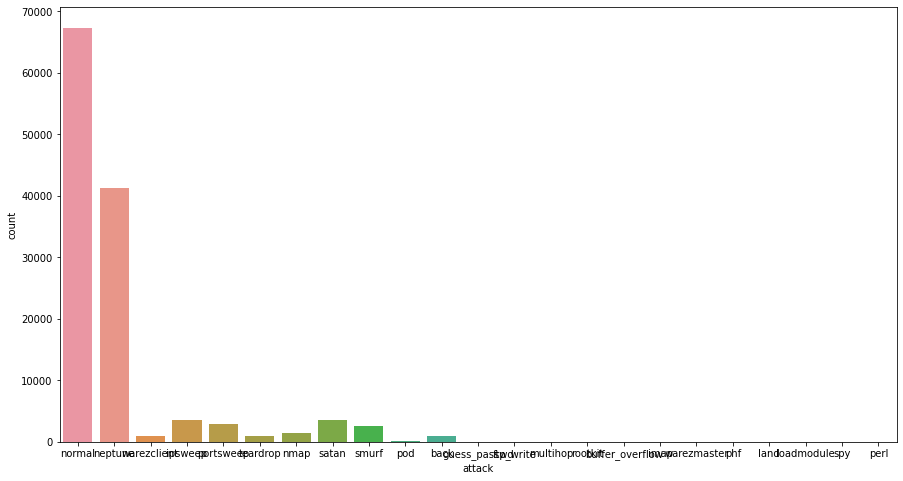

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data = train , x=train['attack'])
plt.show()

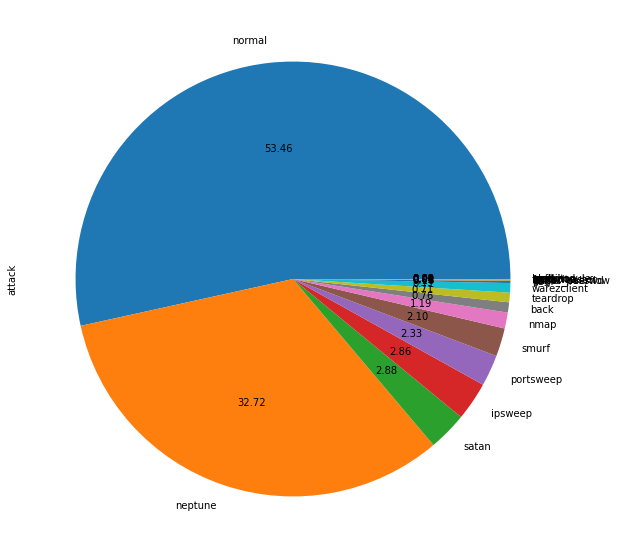

In [ ]:
train['attack'].value_counts().plot(kind = 'pie',figsize=(10,10),autopct= "%0.2f")

In [ ]:
#Replacing all attacks with 'other' except normal and neptune
def attack_type(k):
    if k=='normal':
        return 0
    elif k=='neptune':
        return 1
    else:
        return 2

In [ ]:
train1=train
test1=test

In [ ]:
train1

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [ ]:
train1['attack']=train1['attack'].apply(attack_type)

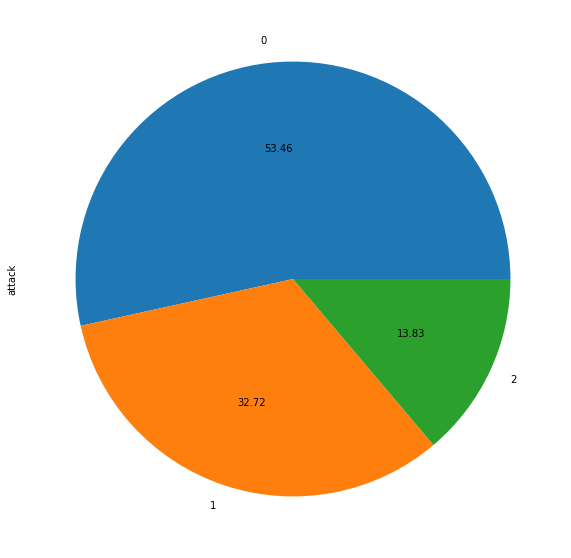

In [ ]:
train1['attack'].value_counts().plot(kind = 'pie',figsize=(10,10),autopct= "%0.2f")

In [ ]:
train1=train
test1=test

In [ ]:

train1['protocol_type'] = train1['protocol_type'].map(protocol_type)
train1['service']=train1['service'].map(service_type)
train1['flag']=train1['flag'].map(flag_type)

In [ ]:
#LABEL ENCODING

In [ ]:
test1['protocol_type'] = test1['protocol_type'].map(protocol_type)
test1['service']=test1['service'].map(service_type)
test1['flag']=test1['flag'].map(flag_type)
test1['attack']=test1['attack'].apply(attack_type)

In [ ]:
train1.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'level'],
      dtype='object')

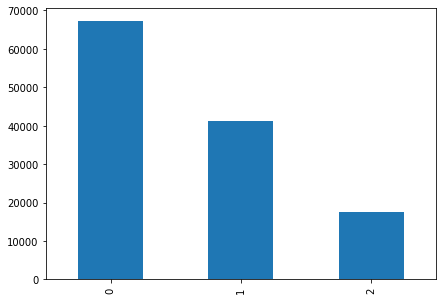

In [ ]:
train1['attack'].value_counts().plot.bar(figsize=(7,5))

In [ ]:
X_train = train1.drop(['attack'],axis=1)
y_train = train1['attack']
X_test = test1.drop(['attack'],axis=1)
y_test = test1['attack']

In [ ]:
y_test

0        1
1        0
2        2
3        2
4        0
        ..
22538    0
22539    0
22540    2
22541    0
22542    2
Name: attack, Length: 22543, dtype: int64

## SMOTE sampling technique

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
scaler = MinMaxScaler()
le = LabelEncoder()
labels_dict = {'normal':0,'neptune':1,'others':2}
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Instances per label in training set\n", y_train.value_counts())
print(X_train.shape)
print(X_test.shape)
labels_dict = {'normal':0,'neptune':1,'others':2}
print(labels_dict)
# training data sampling
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from collections import Counter
over = SMOTE(sampling_strategy='not majority', n_jobs=3)
steps = [('o', over)]
pipeline = Pipeline(steps=steps)
X_train, y_train = pipeline.fit_resample(X_train, y_train)
counter = Counter(y_train)
print(counter)

Instances per label in training set
 0    67342
1    41214
2    17416
Name: attack, dtype: int64
(125972, 42)
(22543, 42)
{'normal': 0, 'neptune': 1, 'others': 2}
Counter({0: 67342, 1: 67342, 2: 67342})


In [ ]:
from sklearn.metrics import accuracy_score

# XG Boost Classifier

In [ ]:
from xgboost import XGBClassifier
xg=XGBClassifier()

#fitting the model
xg.fit(X_train,y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
y_pred=xg.predict(X_test)
xg_acc=accuracy_score(y_test,y_pred)
print(f"Accuracy of xgboost classifier: \n {xg_acc}")

Accuracy of xgboost classifier: 
 0.8646586523532804


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87      9711
           1       0.96      0.99      0.98      4656
           2       0.93      0.67      0.78      8176

    accuracy                           0.86     22543
   macro avg       0.89      0.88      0.88     22543
weighted avg       0.88      0.86      0.86     22543



# Confusion matrix

[[9346    0  365]
 [   2 4632   22]
 [2455  207 5514]]


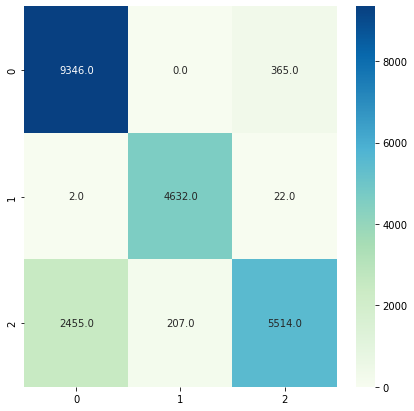

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
cm=confusion_matrix(y_test,y_pred)
print(cm)
fig,ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,cmap='GnBu',fmt="0.1f").plot(ax=ax)
plt.show()

# LSTM Classifier

In [ ]:
#reshape input data to LSTM format i.e., [samples,time_steps,features]
X_train_lstm=X_train.reshape(X_train.shape[0],1,X_train.shape[1])
X_test_lstm=X_test.reshape(X_test.shape[0],1,X_test.shape[1])
print(f"Shape of X_train:",X_train_lstm.shape)
print(f"Shape of X_test:",X_test_lstm.shape)


Shape of X_train: (202026, 1, 42)
Shape of X_test: (22543, 1, 42)


In [ ]:
from tensorflow.keras import Model,Sequential,Input
from tensorflow.keras.layers import LSTM,Dense,Dropout
print(f"num of classes:{3}")
n_classes=3
n_features=X_train_lstm.shape[2]
def multiClassModel(n_features, n_classes):
    model = Sequential()
    model.add(Input(shape=(None, n_features)))
    model.add(LSTM(units=30))
    model.add(Dropout(0.2))
    model.add(Dense(n_classes, activation="softmax", name="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer='Adam')
    model.summary()
    return model

num of classes:3


In [ ]:
model = multiClassModel(n_features, n_classes)
history = model.fit(X_train_lstm, y_train, 
                    epochs=20, batch_size=64, validation_split=0.2)
### check the loss trend of epochs
pd.DataFrame(history.history)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30)                8760      
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 softmax (Dense)             (None, 3)                 93        
                                                                 
Total params: 8,853
Trainable params: 8,853
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
2526/2526 [==============================] - 13s 4ms/step - loss: 0.1269 - val_loss: 0.1111
Epoch 2/20
2526/2526 [==============================] - 10s 4ms/step - loss: 0.0343 - val_loss: 0.0665
Epoch 3/20
2526/2526 [==============================] - 10s 4ms/step - loss: 0.0230 - val_loss: 0.0299
Epoch 4/2

,loss,val_loss
0,0.126873,0.111142
1,0.034282,0.066470
2,0.023013,0.029947
3,0.018580,0.034529
4,0.015837,0.020801
5,0.013938,0.025340
6,0.013034,0.019648
7,0.011939,0.022539
8,0.011377,0.024389
9,0.010448,0.014361


In [ ]:
# predicting on training set
y_train_pred_prob = model.predict(X_train_lstm)
y_test_pred_prob = model.predict(X_test_lstm)
y_train_pred = np.argmax(y_train_pred_prob, axis=1)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)

705/705 [==============================] - 1s 2ms/step


In [ ]:
#CLASSIFICATION REPORT
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86      9711
           1       0.95      0.99      0.97      4656
           2       0.93      0.63      0.75      8176

    accuracy                           0.85     22543
   macro avg       0.89      0.86      0.86     22543
weighted avg       0.87      0.85      0.84     22543



In [ ]:
lstm_acc= accuracy_score(y_test, y_test_pred)
print(f"Accuracy of LSTM: \n {lstm_acc}")

Accuracy of LSTM: 
 0.8505079182007719


[[9387    0  324]
 [   1 4617   38]
 [2784  223 5169]]


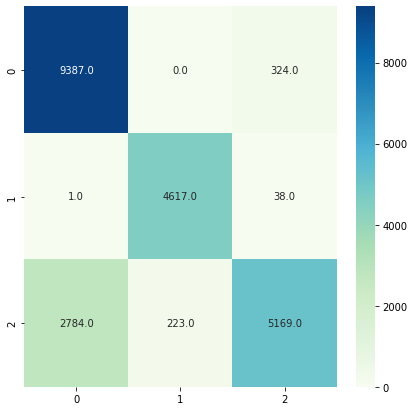

In [ ]:
#CONFUSION MATRIX
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(cm, annot=True,cmap='GnBu',fmt='0.1f').plot(ax=ax)
plt.show()

# Accuracy comparision of models

<Figure size 1080x720 with 0 Axes>

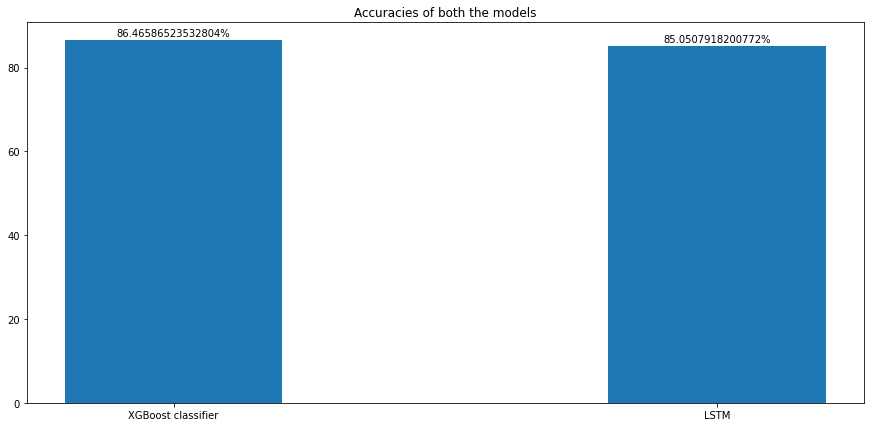

In [ ]:
x =models = ['XGBoost classifier','LSTM']
y = accuracy = [xg_acc*100 , lstm_acc*100]
width = 0.4
plt.figure(figsize=(15,10))
fig, ax = plt.subplots(figsize=(15,7))

pps = ax.bar(x, y, width, align='center')

for p in pps:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height+1,
      s="{}%".format(height),
      ha='center')
plt.title('Accuracies of both the models')
plt.show()